# Notebook

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()
y = titanic_df.pop("Survived")

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
print(titanic_df.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

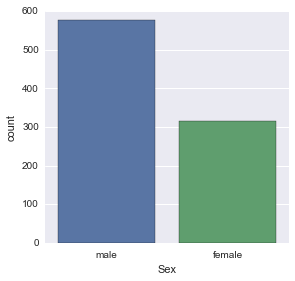

In [8]:
sns.factorplot('Sex',data=titanic_df, kind="count",order=['male','female']) 
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html

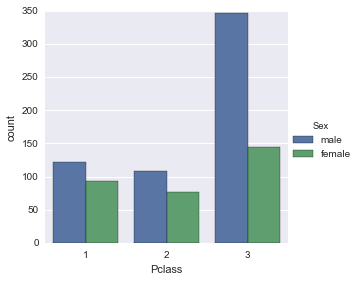

In [77]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', order=[1,2,3])

In [78]:
?sns.factorplot

In [79]:
def person(passenger):
    age,sex = passenger
    
    if age < 18:
        return 'child'
    else:
        return sex

In [80]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(person,axis = 1)
# columnar axis = 1 

In [81]:
titanic_df[0:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


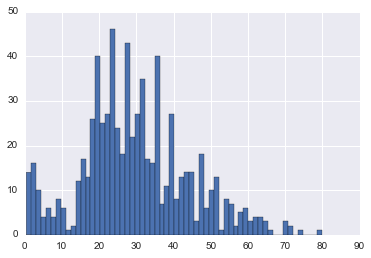

In [82]:
titanic_df['Age'].hist(bins=60)

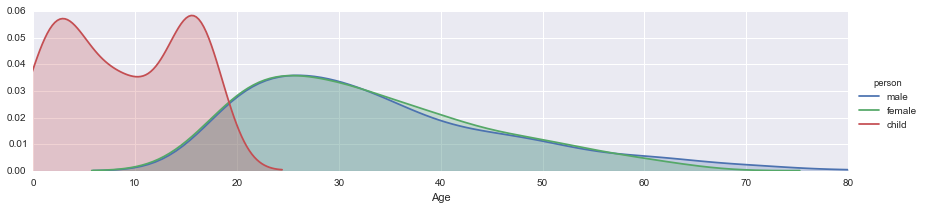

In [83]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

fig.set(xlim=(0, titanic_df['Age'].max()))

fig.add_legend()

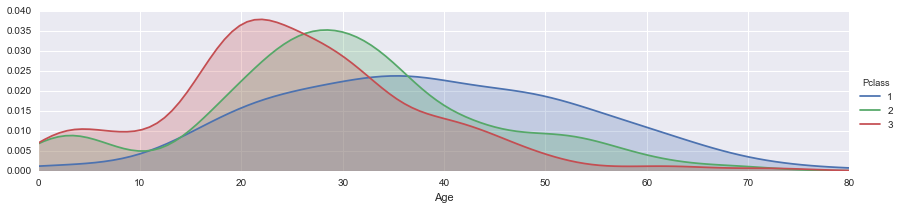

In [84]:
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4, hue_order =[1,2,3])

fig.map(sns.kdeplot, 'Age', shade=True)

fig.set(xlim=(0, titanic_df['Age'].max()))

fig.add_legend()

# Missing data recover from median, convert sex and embark to num

In [85]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())

In [86]:
titanic_df.loc[titanic_df["Sex"] == "male", "Sex"] = 0
titanic_df.loc[titanic_df["Sex"] == "female", "Sex"] = 1

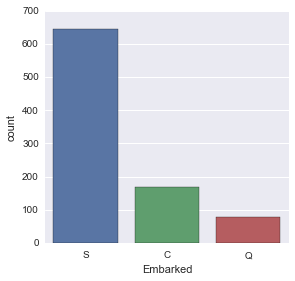

In [87]:
sns.factorplot('Embarked', data=titanic_df, kind='count')

In [88]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
titanic_df.loc[titanic_df["Embarked"] == "S", "Embarked"] = 0
titanic_df.loc[titanic_df["Embarked"] == "C", "Embarked"] = 1
titanic_df.loc[titanic_df["Embarked"] == "Q", "Embarked"] = 2

# Random forrest start

In [89]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestRegressor

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [90]:
model1 = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=40)

In [91]:
model1.fit(titanic_df[predictors],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=40,
           verbose=0, warm_start=False)

In [92]:
# R^2 based on oob prediction
model1.oob_score_

0.41541696444640785

In [93]:
# c-stat (aka ROC/AUC) to do error metric
from sklearn.metrics import roc_auc_score
# using C stat
y_oob = model1.oob_prediction_

print("c-stat:", roc_auc_score(y,y_oob))

c-stat: 0.865289361838


# Second attempt

In [97]:
def describe_categorical(X):
    # return categorical variables only
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [98]:
describe_categorical(titanic_df)

,Name,Sex,Ticket,Cabin,Embarked,person
count,891,891,891,204,891,891
unique,891,2,681,147,3,3
top,"Johnson, Miss. Eleanor Ileen",0,347082,C23 C25 C27,0,male
freq,1,577,7,4,646,519


In [102]:
titanic_df[0:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,female
2,3,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,female
4,5,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,male
5,6,3,"Moran, Mr. James",0,28,0,0,330877,8.4583,NaN,2,male
6,7,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,0,male
7,8,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,0,child
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,0,female
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,1,child
